# **Readout zone detection using YoloV8**

This notebook leverages transfer learning with Yolov8 developped by ultralytics. Yolov8 is the latest version of the Yolo model. The Roboflow API is used to host the dataset.

The dataset is compsoed of individual images of LFA of all sort along with the corresponding bounding box containing the control, test (and antigen line).

The dataset is imported and used to train a Yolov8 model.

The model is then deploied on the Roboflow API.

In [1]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-2.0.1 CPU
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 99.5/228.3 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

# **Train**

In [3]:
# Load a model
model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/data-local.yaml', epochs=50, imgsz=640, batch=10, plots=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-2.0.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/data-local.yaml, epochs=50, patience=50, batch=10, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      11/50         0G      1.159     0.7524      1.074         15        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         55         55          1       0.89      0.975      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/50         0G       1.14     0.7542       1.08          8        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         55         55      0.827       0.26      0.329      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      13/50         0G      1.113     0.7339      1.064         17        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         55         55      0.916      0.945       0.96      0.644

      Epo


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      36/50         0G     0.9004     0.4837     0.9966         18        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         55         55          1      0.999      0.995      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      37/50         0G     0.8863     0.4858     0.9801         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         55         55      0.998      0.964      0.994      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      38/50         0G     0.8777     0.4875     0.9832         12        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         55         55      0.981      0.961      0.965      0.699

      Epo

# **Valid**

In [5]:
from ultralytics import YOLO


# Load a model
model = YOLO('/Users/ldosnon/Desktop/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-2.0.1 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/valid/labelScanning /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/valid/label
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         55         55      0.996          1      0.995      0.819
Speed: 1.9ms pre-process, 316.3ms inference, 0.0ms loss, 0.4ms post-process per image


# **Visualise result**

This is served to visualise the predictions over the test folder images

20-100_jpg.rf.cc0749329f583f77044aa62e83482f53.jpg


Ultralytics YOLOv8.0.20 🚀 Python-3.10.9 torch-2.0.1 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


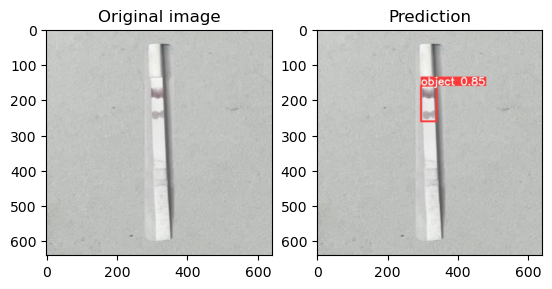

59-100_jpg.rf.3075760b1ce15e31f3bb526909346dbe.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


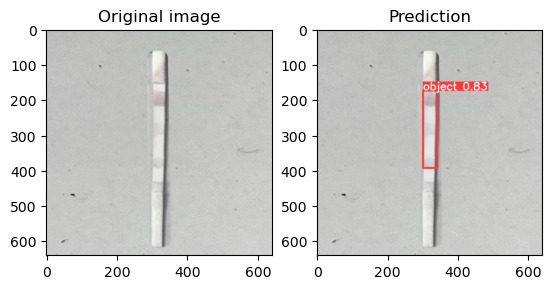

15-10_jpg.rf.51998c36287087c26b02e19be5eff185.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


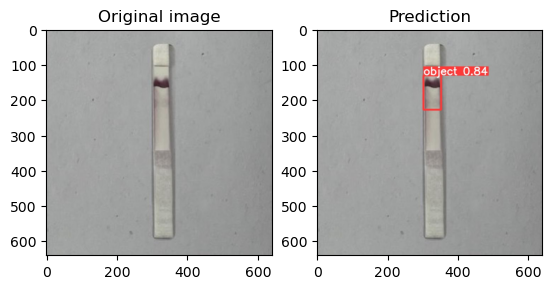

32-1_jpg.rf.cc881d48fc8e6d5165184b9e14173c2a.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


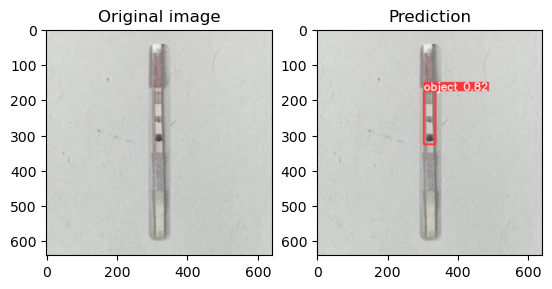

51-80_jpg.rf.ee10fe25ae0f736f92d3387d404f367a.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


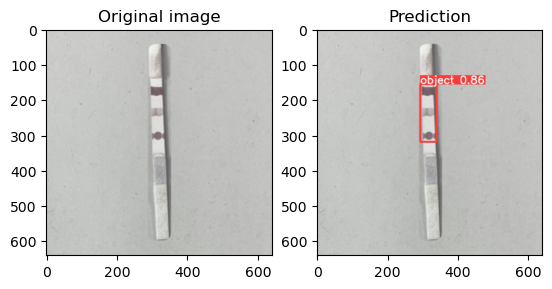

31-50_jpg.rf.8e75874f7b27c2774f8452d5f3b90c77.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


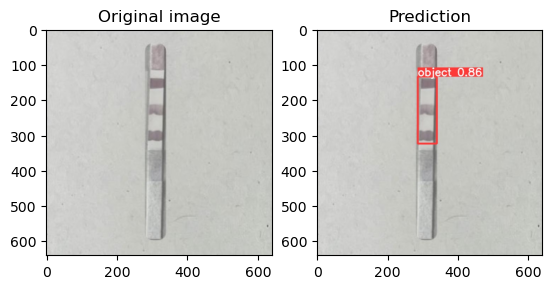

51-100_jpg.rf.6aa89bb812856d9c4525297dbedcf5ad.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


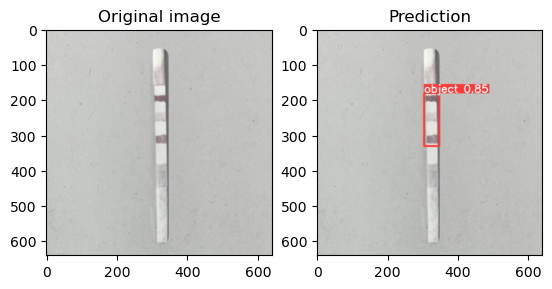

12-0_jpg.rf.a362698ce97b9d9e39a7923a3e934679.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


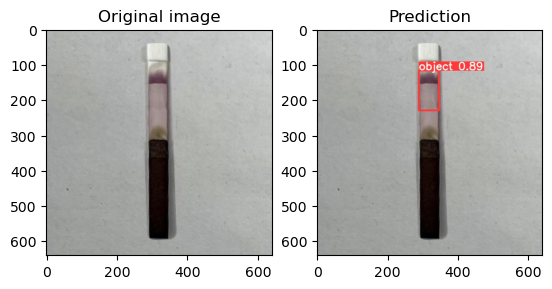

27-10_jpg.rf.0b770985533cd7bd74ebae59e5f714de.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


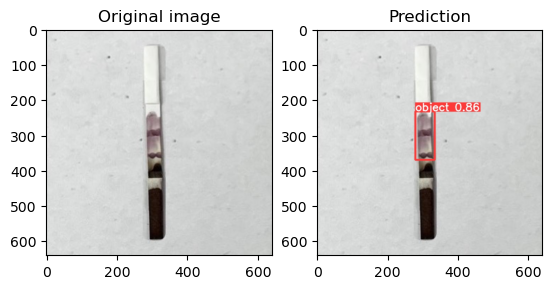

17-250_jpg.rf.9fbd47193396ed604cbc24c8348f6769.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


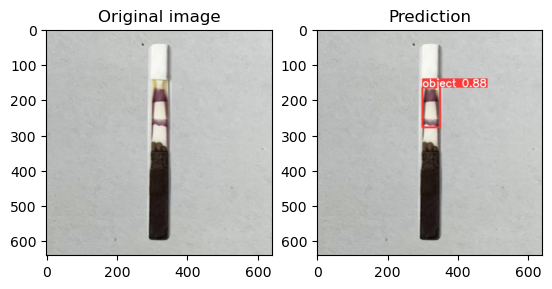

59-0-5_jpg.rf.d7dd566e0e92eb58e53475cfe17cd050.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


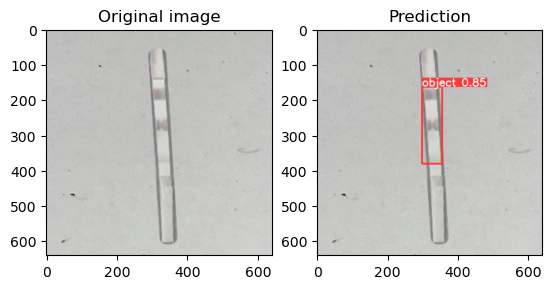

53-0-05_jpg.rf.88d9078144f3d6bb2fda0d98175cf1cc.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


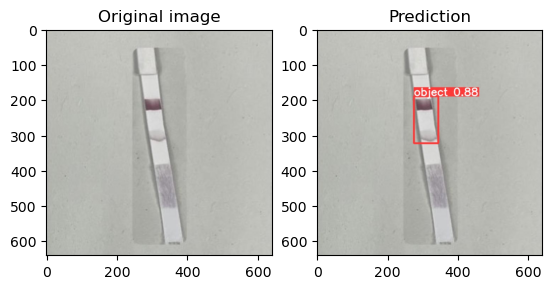

24-250_jpg.rf.63dc574031162f96a715517cae046a21.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


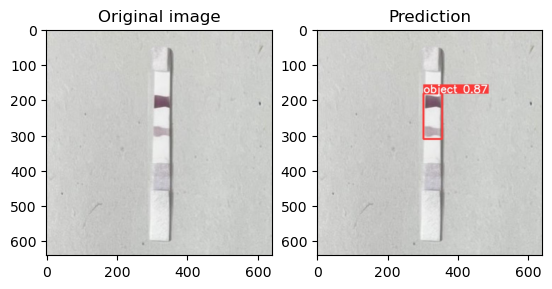

45-100-_jpg.rf.4ab5affeb11447cd111917d43908e035.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


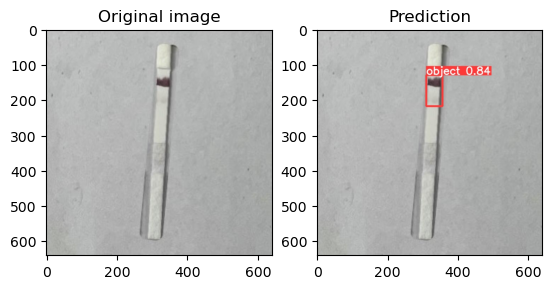

17-10_jpg.rf.5082efc4d3cf5d42f9cbb447d161ba0a.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


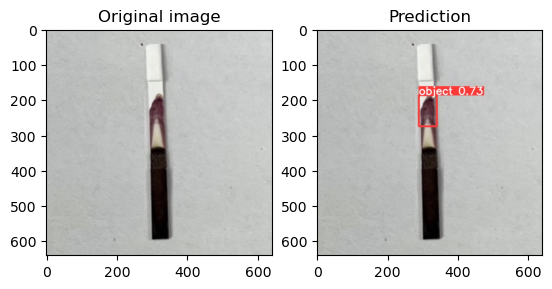

24-0-005_jpg.rf.1ec0c35a492263b67d867f8c8a9dd956.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


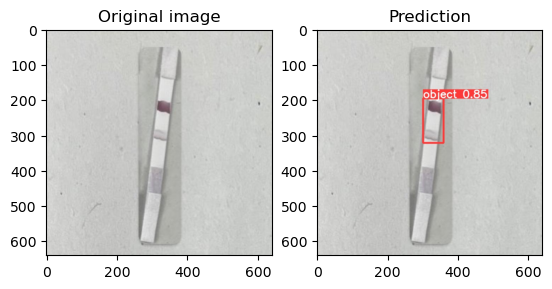

6-250_jpg.rf.0c9cf2dec27cadce6c9809a8857c5c01.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


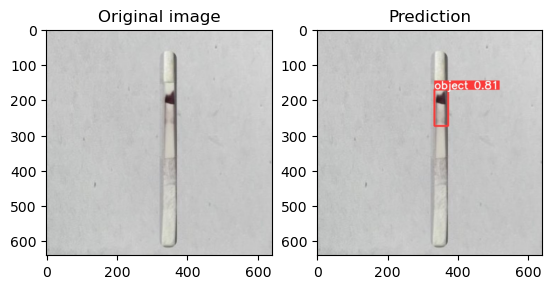

31-0_jpg.rf.fca76011b95fdc7e1574677c8f1dcd96.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


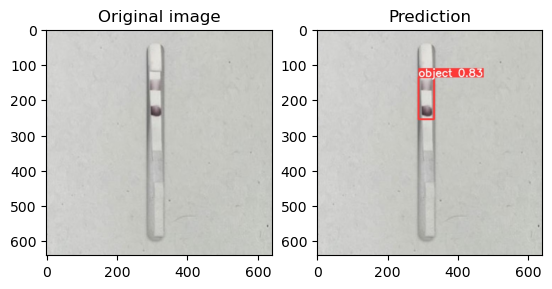

8-250_jpg.rf.2d008113a1bc42e7b7f66246c373be49.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


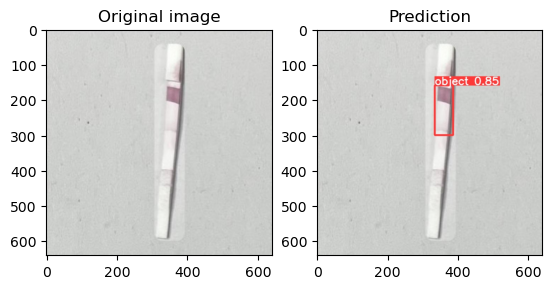

49-15-_jpg.rf.17110234c409b3c40a09b2893bc4c035.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


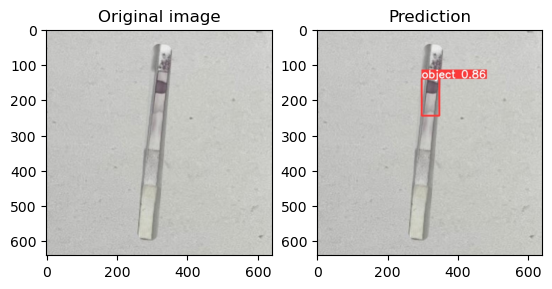

27-500_jpg.rf.63571070227815aa550b4a220b986007.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


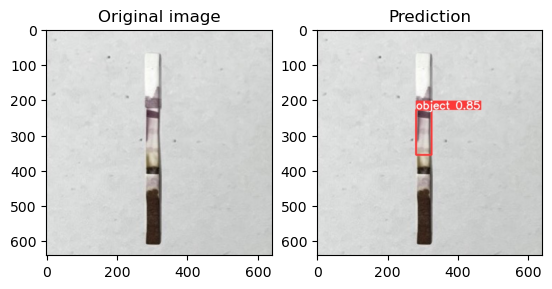

11-25_jpg.rf.206848aa011b4e14dc18d1112f0efe6f.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


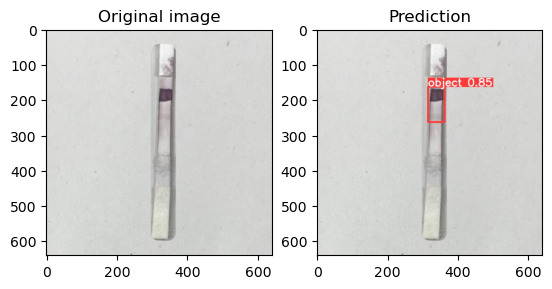

52-0-1_jpg.rf.2d04f59349ffc7f0b518598e865b1229.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


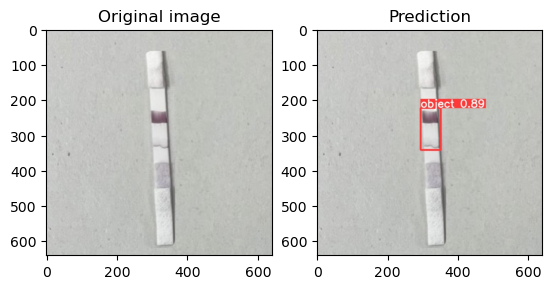

12-50_jpg.rf.f0ba6aaed10319503c99c702822c7147.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


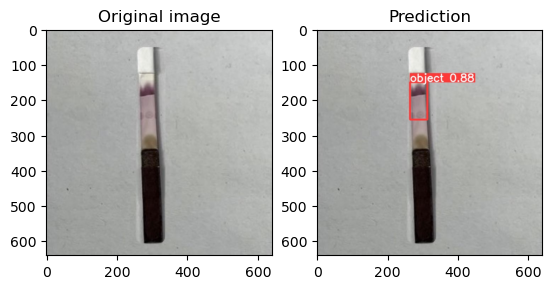

16-500_jpg.rf.ebe770063300bb09f1f126215390a03d.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


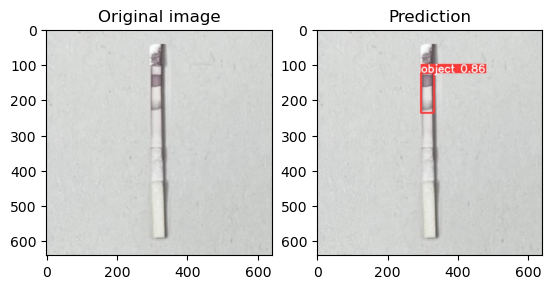

4-230_jpg.rf.84d0f9df9a160406b045a82239bc5929.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


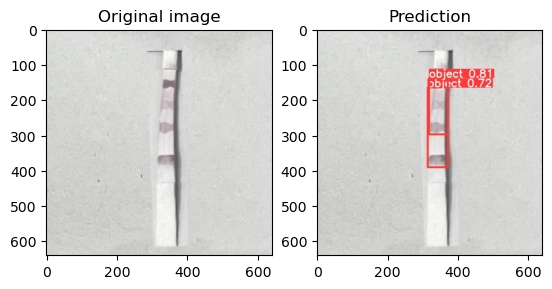

18-10_jpg.rf.fddb5f36889388f7d062bde009723d70.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


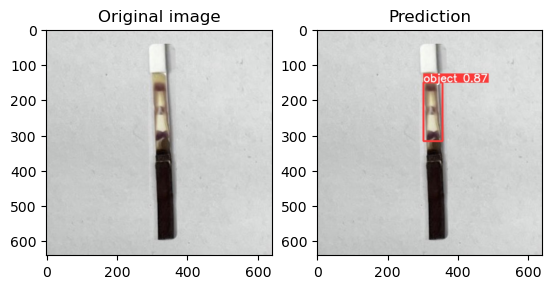

53-250_jpg.rf.b0d175b181aed936e82e456389629936.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


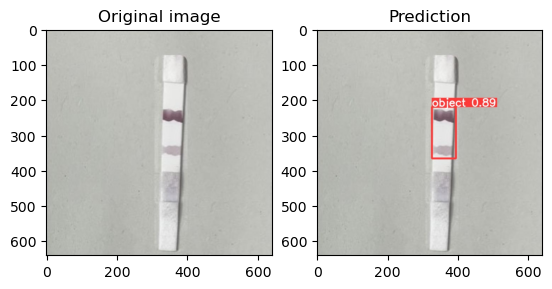

54-25_jpg.rf.e9954fb8937ced456cc35d1c9b93f2ea.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


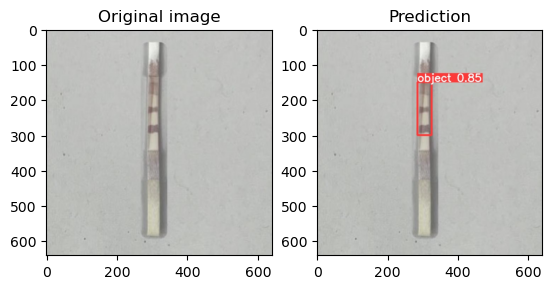

7-25_jpg.rf.b5c7f295b5cd68dd7098e526d22d730f.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


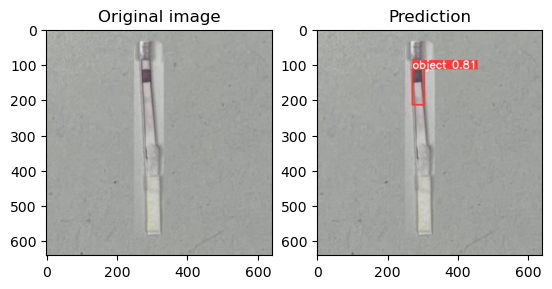

53-1_jpg.rf.18b70d250840d65963f34f8283ec5661.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


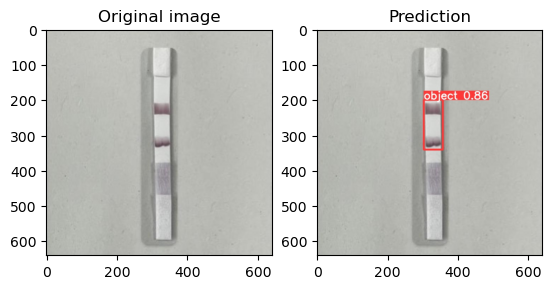

19-0-01_jpg.rf.e982ab3351b574b64900028da41791e9.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


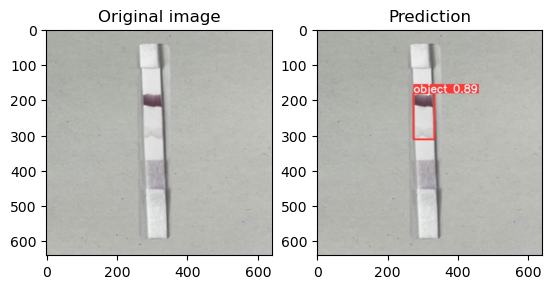

55-100-_jpg.rf.8e70ff64bb873d2666a83a0024d4564b.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


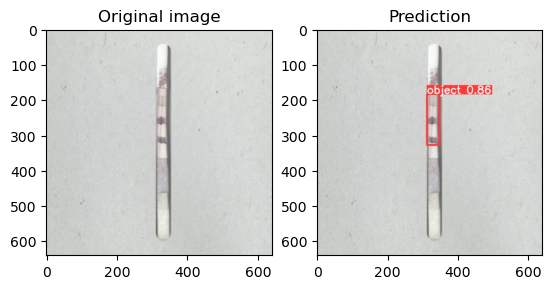

46-35-_jpg.rf.78b9c15f6ca10639ef0c8a6bf823fcda.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


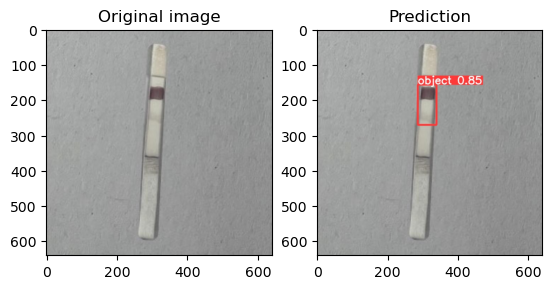

18-0mg-_jpg.rf.21c8e6a8a8f6002bcdc3243d1ac9021e.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


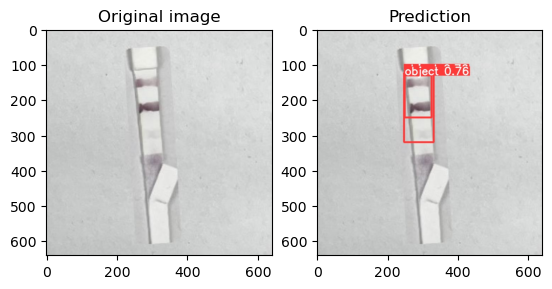

62-5_jpg.rf.8d1dd9066ef3c1a70153b79b7af8c171.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


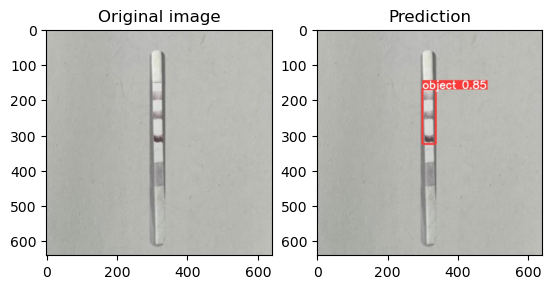

29-10_jpg.rf.6ddfc97a249fa6510ebbab15b9f28e11.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


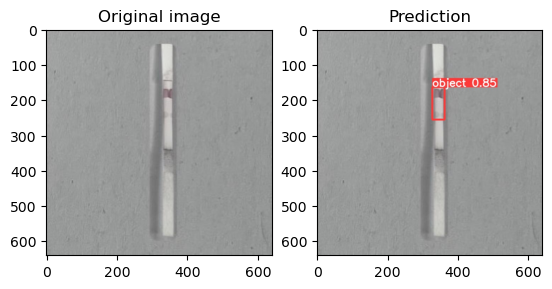

6-500-_jpg.rf.75ead0b2fd167d894e17c5940f0f7c1a.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


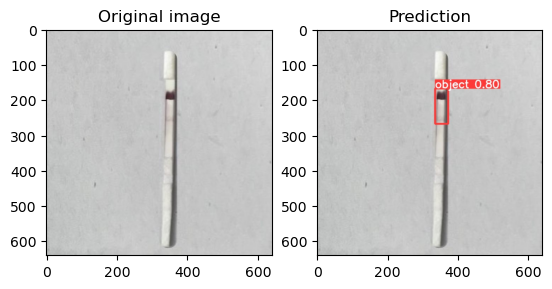

6-10-_jpg.rf.08ff54383ce019a68d0ee1c2a09b8280.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


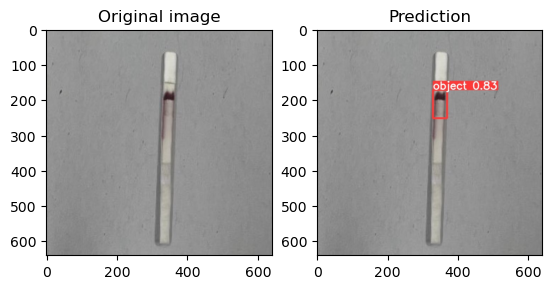

31-1_jpg.rf.82fe0c43488195a9fae6e443889b767a.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


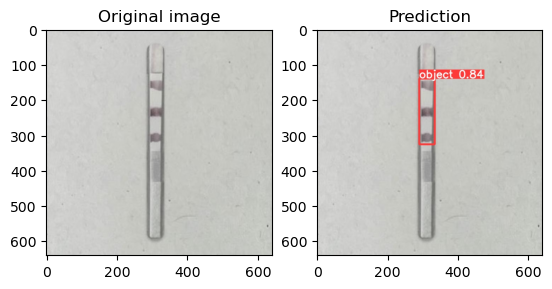

48-50_jpg.rf.2100dee47de125e1e56a698719e0c92c.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


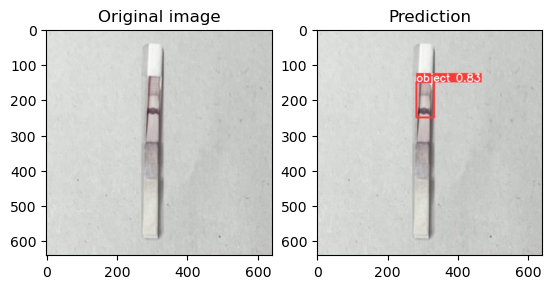

46-100_jpg.rf.4f413936cda1c19e0d91e0207e1c5cd5.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


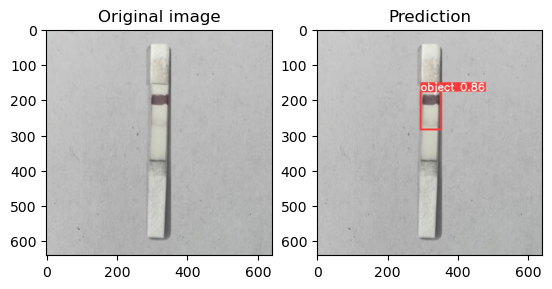

62-150_jpg.rf.76b1e7079ecacdcbae192431d1c61746.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


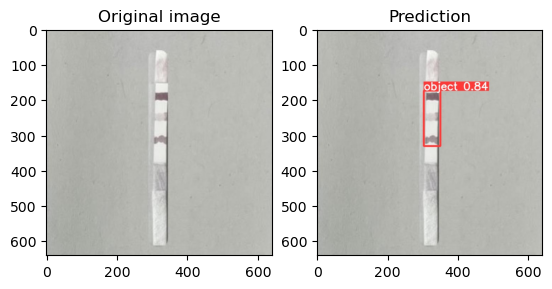

62-25_jpg.rf.e90e7c076040e07f971b5870f9ca475c.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


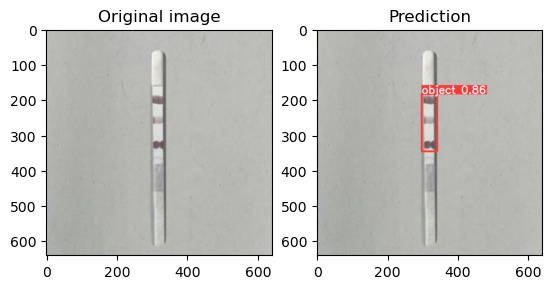

56-0-1_jpg.rf.6555ae7220d83ac8161d3799342ffb5a.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


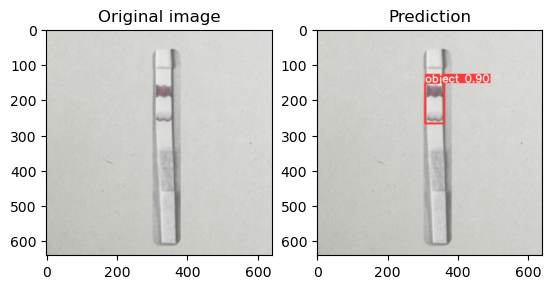

46-100-_jpg.rf.6cae5518116b35aa6a73dc573d9cdbb8.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


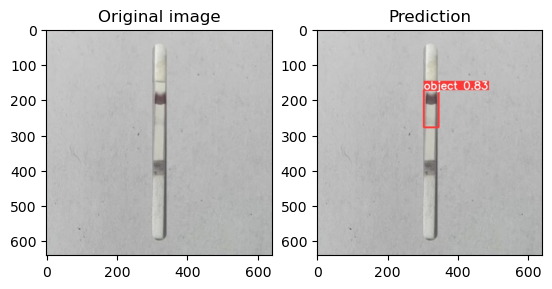

3-25_jpg.rf.26f18df115814159e6acc4894dcede81.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


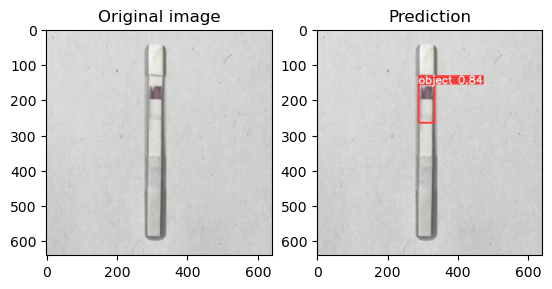

11-100_jpg.rf.4f63e0a288a56cad80cfd96a4f712a4b.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


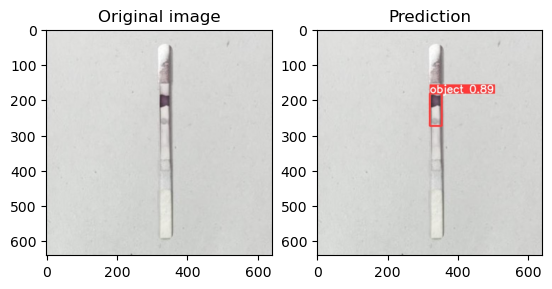

21-100_jpg.rf.7a41b46757ba4cabdcd21e06b7475665.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


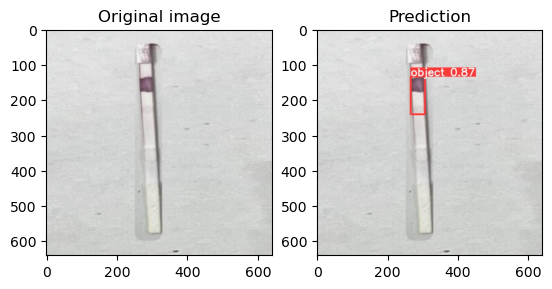

39-100_jpg.rf.9b9255ee2af16380c55b98b64f5fe906.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


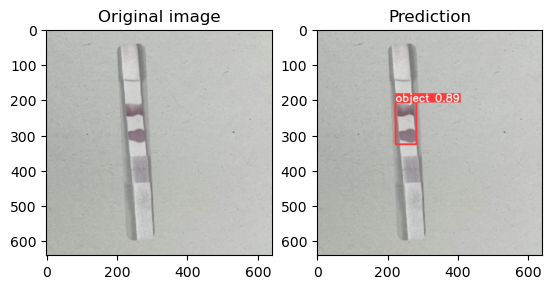

57-50_jpg.rf.b91fc62473e4df9225e0183028df55b7.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


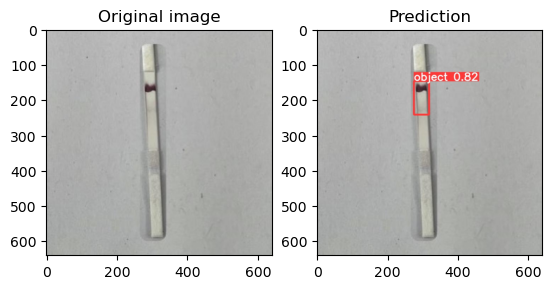

26-50_jpg.rf.49a769c37962223830283d2e02926da9.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


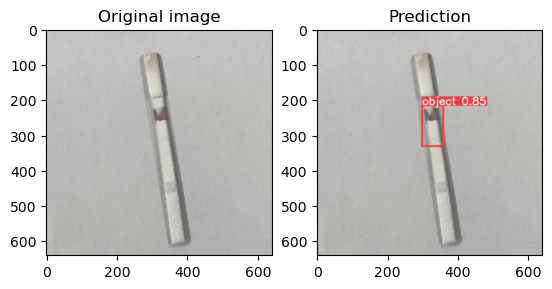

29-250-_jpg.rf.df6d5bc08bbab05e9dbb4e52522a5872.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


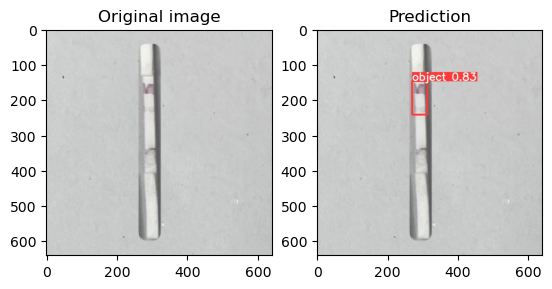

60-5-_jpg.rf.ddf74bc42432108938b0a4fa07142ac2.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


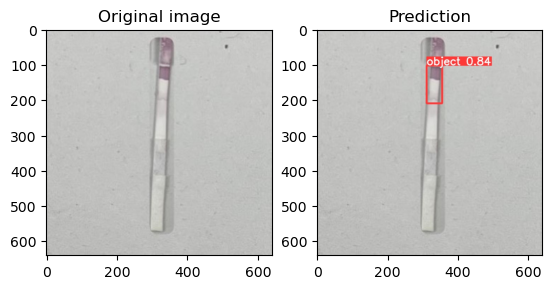

26-35_jpg.rf.3ab0e7c71c837e457b8029b67ba35b28.jpg


Results saved to /Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction2


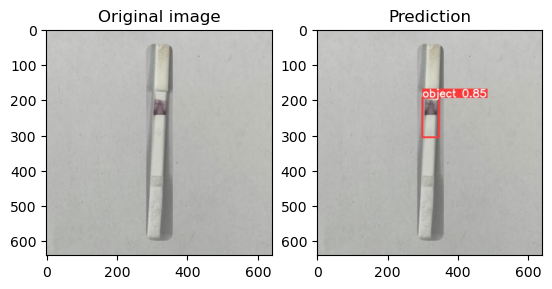

In [3]:
import cv2
import matplotlib.image as mpimg
import os
import glob
import shutil
import matplotlib.pyplot as plt

model = YOLO('/Users/ldosnon/Desktop/runs/detect/train/weights/best.pt')  # load a custom model

list_files = os.listdir("/Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/images/")

for filename, i in zip(glob.glob("/Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/images/*.jpg"),range(len(list_files))): #assuming gif
    inputimage= filename
    print(filename[67:])
    model.predict(filename, conf=0.5, project="/Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/", name='prediction', save = True)
    ori_img = mpimg.imread(filename)
    img = mpimg.imread('/Users/ldosnon/Desktop/data_yolov8/RZD_yolov8_database/test/results/prediction/' + filename[67:])
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(ori_img)
    axs[0].set_title('Original image')
    axs[1].imshow(img)
    axs[1].set_title('Prediction')
    plt.show()
  #os.remove('/content/drive/MyDrive/Colab Notebooks/database_for_ML/RZD_yolov8_database/test/results/prediction/' + filename[87:])


#Activate if the prediction should not be kept
#shutil.rmtree("/content/drive/MyDrive/Colab Notebooks/database_for_ML/RZD_yolov8_database/test/result/")





In [52]:
#shutil.rmtree("/content/drive/MyDrive/Colab Notebooks/database_for_ML/RZD_yolov8_database/test/result/")
